In [187]:
import pandas as pd # manipulation des tableaux
import numpy as np # calcul matriciel, algebrique
import matplotlib.pyplot as plt # visualisation graphique des donnees, pyplot pour le tracage des graphiques en 2D
import seaborn as sns # manipulation des statistiques

In [188]:
import warnings # generer les erreurs et les alertes
warnings.filterwarnings("ignore") # ignorer les alertes

In [189]:
df = pd.read_csv("Churn_Modelling.csv") #importer la base de donnée
df.shape

(10000, 14)

In [190]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [191]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [192]:
df.shape

(10000, 11)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [194]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [195]:
df.describe(include='object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [196]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: xlabel='Exited'>

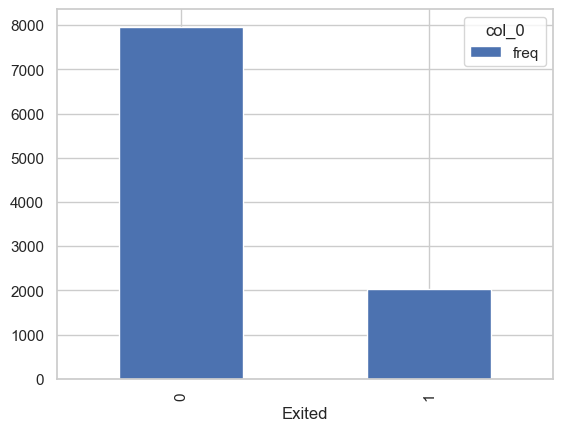

In [197]:
pd.crosstab(df.Exited, 'freq').plot.bar()

array([<Axes: ylabel='freq'>], dtype=object)

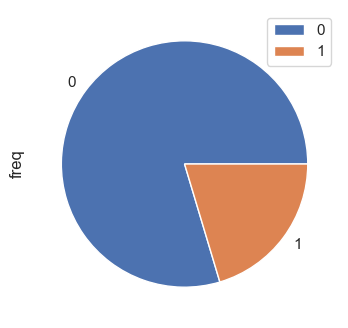

In [198]:
pd.crosstab(df.Exited, 'freq').plot.pie(subplots=True, figsize = (4, 4))

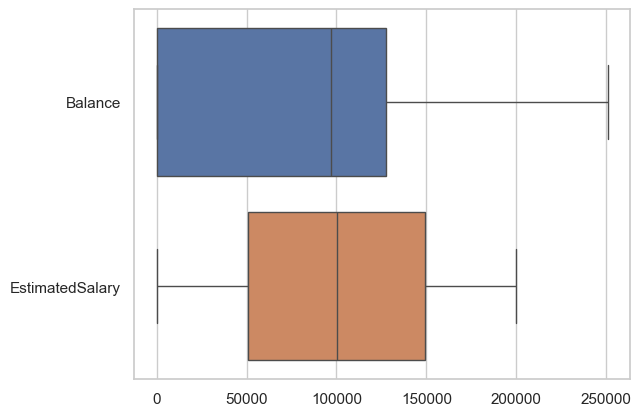

In [199]:
list_plot = ['Balance','EstimatedSalary']

sns.set_theme(style='whitegrid')
sns.boxplot(data=df[list_plot], orient='h')
plt.show()

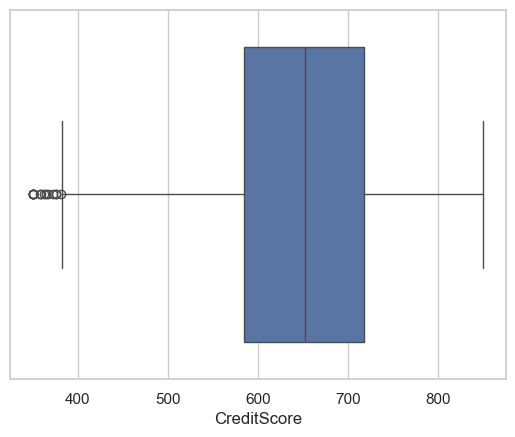

In [200]:
sns.set_theme(style='whitegrid')
sns.boxplot(df['CreditScore'],orient='h')
plt.show()

In [201]:
q1 = df['CreditScore'].quantile(0.25)
q2 = df['CreditScore'].quantile(0.75)
IQR = q2-q1
b_inf = q1-1.5*IQR
b_sup = q2+1.5*IQR
df = df[df['CreditScore']>b_inf]
df = df[df['CreditScore']<b_sup]

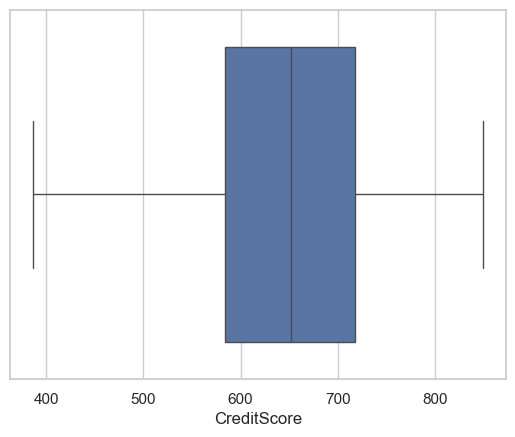

In [202]:
sns.set_theme(style='whitegrid')
sns.boxplot(df['CreditScore'],orient='h')
plt.show()

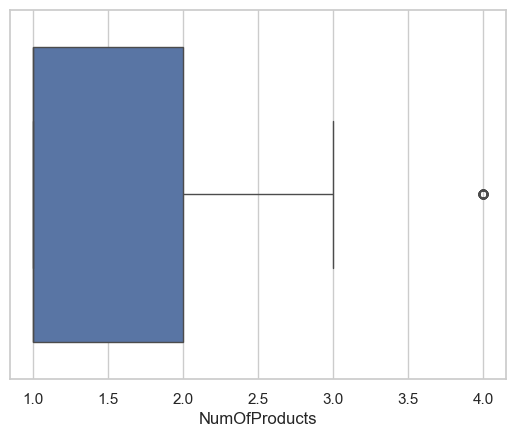

In [203]:
sns.set_theme(style='whitegrid')
sns.boxplot(df['NumOfProducts'],orient='h')
plt.show()

In [204]:
q1 = df['NumOfProducts'].quantile(0.25)
q2 = df['NumOfProducts'].quantile(0.75)
IQR = q2-q1
b_inf = q1-1.5*IQR
b_sup = q2+1.5*IQR
df = df[df['NumOfProducts']>b_inf]
df = df[df['NumOfProducts']<b_sup]

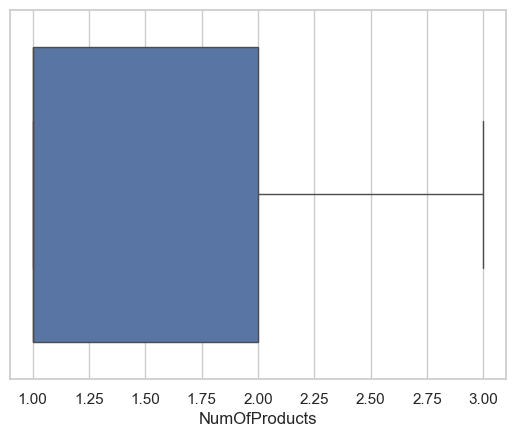

In [205]:
sns.set_theme(style='whitegrid')
sns.boxplot(df['NumOfProducts'],orient='h')
plt.show()

In [206]:
X = df.iloc[:, :10].values
y = df.iloc[:, 10].values

In [207]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('state',OneHotEncoder(),[1, 2])],remainder='passthrough')
X=ct.fit_transform(x)

In [208]:
X[0:5,:]

array([[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 619, 42, 2, 0.0, 1, 1, 1,
        101348.88],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 608, 41, 1, 83807.86, 1, 0, 1,
        112542.58],
       [1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 502, 42, 8, 159660.8, 3, 1, 0,
        113931.57],
       [1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 699, 39, 1, 0.0, 2, 0, 0,
        93826.63],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 850, 43, 2, 125510.82, 1, 1,
        1, 79084.1]], dtype=object)

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape

(7940, 15)

In [210]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [211]:
lr.coef_

array([[-4.88549550e-01,  3.38669306e-01, -8.54631455e-03,
        -1.41333929e-01, -3.47215619e-01,  2.70388949e-01,
        -4.20269193e-01, -2.78852289e-03,  5.72789011e-02,
        -4.22413559e-02,  1.04151130e-07, -4.21865956e-01,
        -1.10594192e-01, -6.47540497e-01, -4.25408537e-07]])

In [212]:
lr.intercept_

array([-0.14989593])

In [213]:
lr.coef_[0]

array([-4.88549550e-01,  3.38669306e-01, -8.54631455e-03, -1.41333929e-01,
       -3.47215619e-01,  2.70388949e-01, -4.20269193e-01, -2.78852289e-03,
        5.72789011e-02, -4.22413559e-02,  1.04151130e-07, -4.21865956e-01,
       -1.10594192e-01, -6.47540497e-01, -4.25408537e-07])

In [214]:
y_pred = lr.predict(X_train)

for i in range(10):
    print([y_train[i],y_pred[i]])

[1, 1]
[0, 0]
[0, 0]
[1, 0]
[0, 1]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]


In [215]:
from sklearn import metrics

fpr, tpr, thr = metrics.roc_curve(y_train, y_pred)
roc_auc_log_reg = metrics.auc(fpr, tpr)

In [216]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [217]:
y_pred_prob = model.predict_proba(X_test)
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 ... 0 0 0]


In [218]:
print(y_pred[0])

0


In [219]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1479  115]
 [ 351   40]]


In [220]:
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_prob[:, 1])
roc_auc_log_reg = metrics.auc(fpr, tpr)

In [221]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [222]:
y_pred_knn_proba = model.predict_proba(X_test)
y_pred_knn= model.predict(X_test)

print(y_pred_knn)

[0 1 0 ... 0 0 0]


In [223]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
model = KNeighborsClassifier()
grid = GridSearchCV(model, parameters, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 15}
0.7969773299748111


In [224]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[1479  115]
 [ 351   40]]


In [225]:
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, y_pred_knn_proba[:, 1])
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)

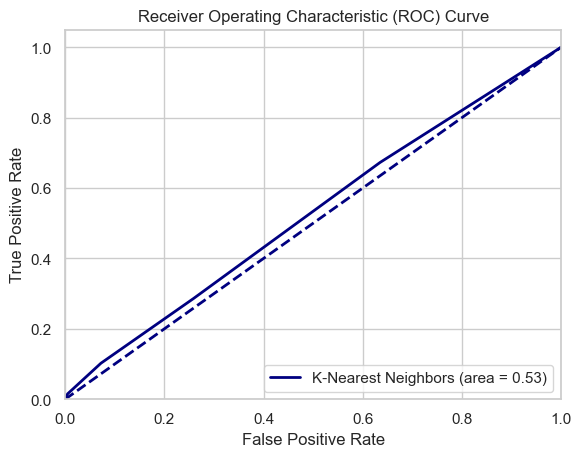

In [226]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='navy', lw=2, label='K-Nearest Neighbors (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

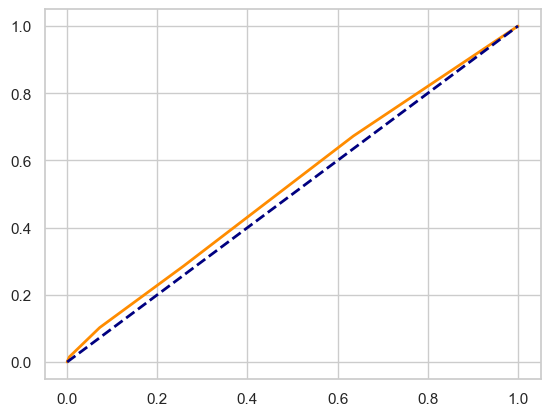

In [227]:
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
